# Loan Approval Prediction System

#### This project aims to build a machine learning model to predict loan approval based on various features.

**Objective**: Develop a Random Forest model to predict loan approval using applicant data.

---

## **Key Steps**:

1. **Data Loading**:
   - Load dataset with features: income, credit score, loan amount, DTI ratio, employment status, loan purpose.

2. **Data Preprocessing**:
   - Handle missing values.
   - Encode categorical variables (e.g., employment status).
   - Normalize/scale numerical features.

3. **Feature Extraction**:
   - Select key features impacting approval.
   - Perform feature engineering if needed.

4. **Model Training**:
   - Split data into train/test sets.
   - Train Random Forest classifier.

5. **Model Evaluation**:
   - Evaluate using metrics: accuracy, precision, recall, F1-score.
   - Perform cross-validation for robustness.

6. **Model Deployment (Optional)**:
   - Deploy model via streamlit for real-time predictions.

---

## **Expected Outcomes**:
- Accurate loan approval predictions.
- Insights into key features driving approval.
- Optional web-based prediction interface.

---

## About Data
This dataset contains information about loan applications, including various attributes of the applicants and the approval status of their loan requests.

### Key Features in datasets:
##### 1.) Text: A description of why the loan is needed.
##### 2.)Income: The annual income of the applicant.
##### 3.)Credit_Score: The credit score of the applicant.
##### 4.)Loan_Amount: The amount of the loan requested.
##### 5.)DTI_Ratio: The debt-to-income ratio of the applicant.
##### 6.)Employment_Status: The employment status of the applicant (employed or unemployed).
##### 7.)Approval: The loan approval status (Rejected or Approved).

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import joblib
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load the loan data from csv file

In [2]:
def load_file():
    try:
        df = pd.read_csv("loan_data.csv")
        print("File loaded sucessfully !")
        return df
    except FileNotFoundError:
        print("Make sure that file is availabel in current directory!")
        return None
    except Exception as e:
        print(f"Error : {str(e)}")
        return None

df = load_file()

File loaded sucessfully !


# Displaying the first few rows of the DataFrame

In [3]:
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


# Getting information about the datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


# Findings
### DataFrame Summary
- **Shape:** 24,000 rows, 7 columns
- **Data Types:** 3 int64, 1 float64, 3 object
---

# Checking for missing values

In [5]:
df.isnull().sum()

Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

# Findings
- No missing values in any column.
---

# Checking for duplicate rows

In [6]:
df.duplicated().sum()

np.int64(0)

# Findings
- No duplicate values in any column.
---

# previewing basic statistics of datasets

In [7]:
df.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


### Basic Statistics Summary

- **Income:** 
  - Mean: $110378
  - Median: $110464
  - Std Dev: $51730
  - Range: $20000 - $200000

- **Credit Score:**
  - Mean: 576
  - Median: 575
  - Std Dev: 159
  - Range: 300 - 850

- **Loan Amount:**
  - Mean: $44356
  - Median: $35207
  - Std Dev: $34667
  - Range: $1005 - $158834

- **DTI Ratio:**
  - Mean: 34.7
  - Median: 24.86
  - Std Dev: 32.3
  - Range: 2.53 - 246.33
---

# Preprocess the text data

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return " ".join(filtered_tokens)

df["clean_text"] = df["Text"].apply(preprocess_text)

In [9]:
df["clean_text"].head()

0          need loan pay international vacation family
1    want make home improvements like installing so...
2    need loan home renovation including kitchen re...
3        need funds buy new furniture appliances house
4                       need loan start small business
Name: clean_text, dtype: object

# Encode categorical variables

In [10]:
df["Employment_Status"] = df["Employment_Status"].replace({"unemployed": 0, "employed": 1}).astype(int)
df["Approval"] = df["Approval"].replace({"Rejected" : 0, "Approved" : 1}).astype(int)

C:\Users\ACER\AppData\Local\Temp\ipykernel_3668\1441878704.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Employment_Status"] = df["Employment_Status"].replace({"unemployed": 0, "employed": 1}).astype(int)
C:\Users\ACER\AppData\Local\Temp\ipykernel_3668\1441878704.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Approval"] = df["Approval"].replace({"Rejected" : 0, "Approved" : 1}).astype(int)


In [11]:
df["Employment_Status"].value_counts()

Employment_Status
0    12007
1    11993
Name: count, dtype: int64

In [12]:
df["Approval"].value_counts()

Approval
0    20067
1     3933
Name: count, dtype: int64

# Visualizing the distribution of categorical features like Employment_Status and Loan Approval

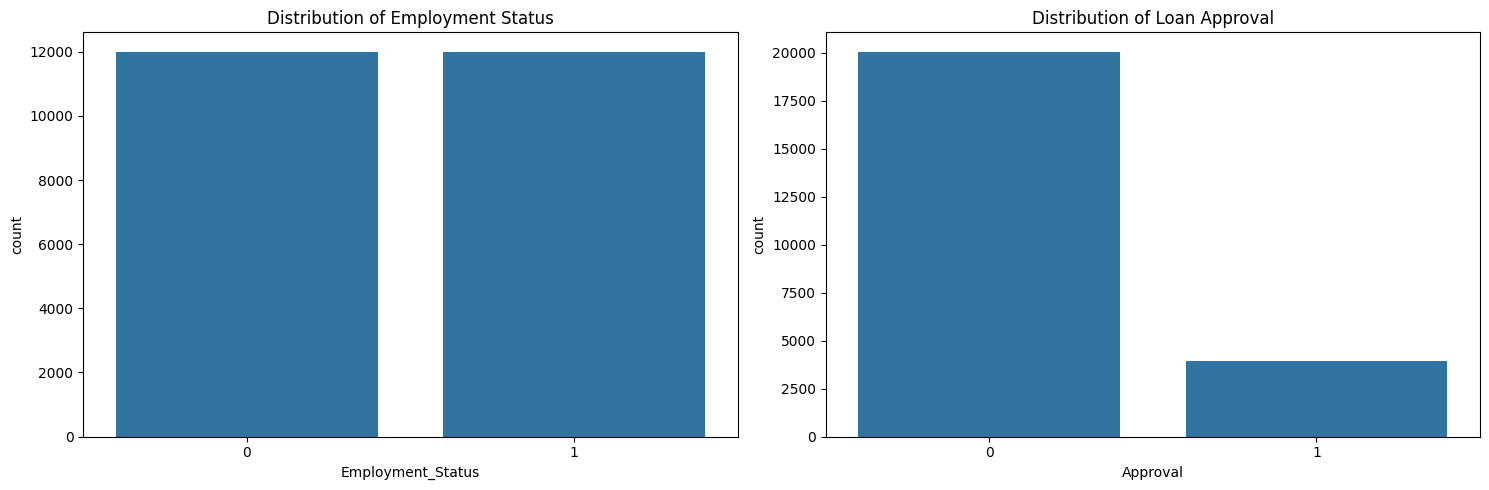

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Employment_Status', data=df)
plt.title('Distribution of Employment Status')

plt.subplot(1, 2, 2)
sns.countplot(x='Approval', data=df)
plt.title('Distribution of Loan Approval')

plt.tight_layout()
plt.show()

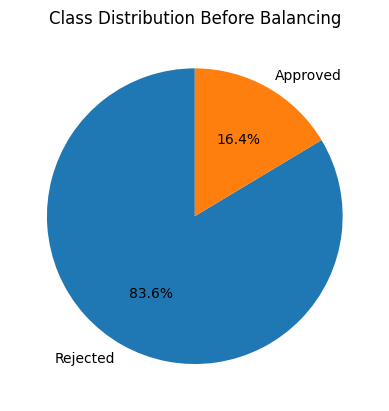

In [14]:
df['Approval'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Rejected', 'Approved'], startangle=90)
plt.title('Class Distribution Before Balancing')
plt.ylabel('')
plt.savefig('Class Distribution Before Balancing.png')
plt.show()

# Balancng the dataset

In [15]:
rejected = df[df["Approval"] == 0 ]

approved = df[df["Approval"] == 1]

# Downsample the majority class (Rejected) to match the minority class size
rejected_downsampled = rejected.sample(n=len(approved), random_state=42)

# Combine both classes into a balanced dataset
df_balanced = pd.concat([rejected_downsampled, approved])

# Check the new class distribution
print("\nBalanced Class Distribution (Downsampling):")
df_balanced["Approval"].value_counts()


Balanced Class Distribution (Downsampling):


Approval
0    3933
1    3933
Name: count, dtype: int64

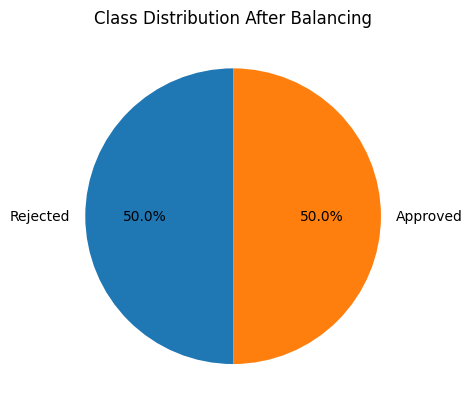

In [16]:
df_balanced['Approval'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Rejected', 'Approved'], startangle=90)
plt.title('Class Distribution After Balancing')
plt.ylabel('')
plt.savefig("Class Distribution After Balancing.png")
plt.show()

# Data Summary and Analysis

## **Initial Class Distribution (Before Balancing)**
- **Rejected (0):** 83.6%
- **Approved (1):** 16.4%

### **Key Insights**
- **Employment Status:**
  - **Unemployed (0):** 12,007 applicants
  - **Employed (1):** 11,993 applicants
- **Loan Approval:**
  - **Rejected (0):** 20,067 applicants
  - **Approved (1):** 3,933 applicants

## **Balanced Class Distribution (After Balancing)**
- **Rejected (0):** 50.0%
- **Approved (1):** 50.0%

### **Balancing Technique**
- **Downsampling:**
  - Adjusted the majority class (Rejected) to match the minority class (Approved).
  - **Final Counts:**
    - **Rejected (0):** 3,933 applicants
    - **Approved (1):** 3,933 applicants

## **Analysis**
- The dataset initially had a **heavy class imbalance**, with rejected applications dominating (83.6%).
- **Downsampling** was applied to create a balanced dataset, ensuring equal representation of both classes.
- This balanced dataset is critical for training machine learning models, as it prevents bias toward the majority class and improves model performance in predicting both approved and rejected loans.

---

# Feature extraction

In [17]:
vectorizer = TfidfVectorizer(max_features=100)
X_text = vectorizer.fit_transform(df_balanced["clean_text"]).toarray()

# Scale numerical features

In [18]:
scaler = StandardScaler()
structured_features = df_balanced[["Income", "Credit_Score", "Loan_Amount", "DTI_Ratio", "Employment_Status"]]
X_structured = scaler.fit_transform(structured_features)

# Combine text and structured features

In [19]:
X_combined = np.hstack((X_text, X_structured))

# "Model Training, Evaluation, and Prediction for Loan Approval Using Random Forest"

In [20]:
X = X_combined
y = df_balanced["Approval"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report (Downsampling):\n", classification_report(y_test, y_pred))

Classification Report (Downsampling):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       787
           1       0.97      1.00      0.98       787

    accuracy                           0.98      1574
   macro avg       0.98      0.98      0.98      1574
weighted avg       0.98      0.98      0.98      1574



# Analysis

After applying downsampling to balance the classes, the classification model achieved **high performance metrics**:
- **Precision** and **Recall** are above **0.97**, indicating the model excels at correctly identifying both rejected and approved loans.
- The **F1-Score**, which balances precision and recall, is **0.98** for both classes.
- The **overall accuracy** of the model is **98%**, showcasing its effectiveness in predicting loan approvals after addressing the class imbalance.

This demonstrates that balancing the dataset significantly improved the model's ability to handle both classes equally and make accurate predictions.

# Getting training and testing scores

In [21]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 98.16%


# Model Performance

- **Training Accuracy:** 100.00%  
  The model achieved perfect accuracy on the training data, indicating it learned the patterns in the training set very well.

- **Testing Accuracy:** 98.16%  
  The model maintained high accuracy on the test data, demonstrating its ability to generalize well to unseen data.

This strong performance suggests the model is both highly accurate and reliable for predicting loan approvals.

---

In [22]:
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]

# Create a DataFrame for training data predictions
train_predictions = pd.DataFrame({"Actual": y_train, "Predicted": y_train_pred, "Probability": y_train_proba})

y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

# Create a DataFrame for testing data predictions
test_predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_test_pred, "Probability": y_test_proba})

print("==" *25)
print("Training Data Predictions:")
print(train_predictions.sample(5, random_state=42).to_string(index=False))

print("==" *25)
print("Testing Data Predictions:")
print(test_predictions.sample(5, random_state=42).to_string(index=False))

try:
    train_predictions.to_csv("train_predictions.csv", index=False)
    test_predictions.to_csv("test_predictions.csv", index=False)
except Exception as e:
    print(f"Error saving predictions: {str(e)}")

Training Data Predictions:
 Actual  Predicted  Probability
      1          1         0.99
      0          0         0.04
      1          1         1.00
      1          1         1.00
      0          0         0.02
Testing Data Predictions:
 Actual  Predicted  Probability
      1          1         0.89
      1          1         0.95
      1          1         0.98
      1          1         0.96
      1          1         0.96


### **Insights**:
- The model shows **high confidence** in its predictions, with probabilities close to 1 for correct predictions.
- Both training and testing predictions align well with actual values, indicating **strong performance** and **generalization**.
- Generalization ensures the model is not just memorizing the training data but is capable of making accurate predictions in real-world scenarios.
- The model performs well on both the training data and the test data (e.g., high testing accuracy of 98.16% )

# Perform cross-validation

In [23]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_combined, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.97649301 0.97520661 0.97902098 0.9726637  0.97393516]
Mean Cross-Validation Accuracy: 0.9754638915433649


### **Insights**:
- The cross-validation scores are consistent and high across all folds, indicating the model is **stable** and **reliable**.
- The **mean accuracy of 97.55%** confirms the model's strong performance and ability to generalize well to unseen data.
- This further validates the model's effectiveness in predicting loan approvals.

# Visualize Feature Importance which help us understand which features are most influential in our model.

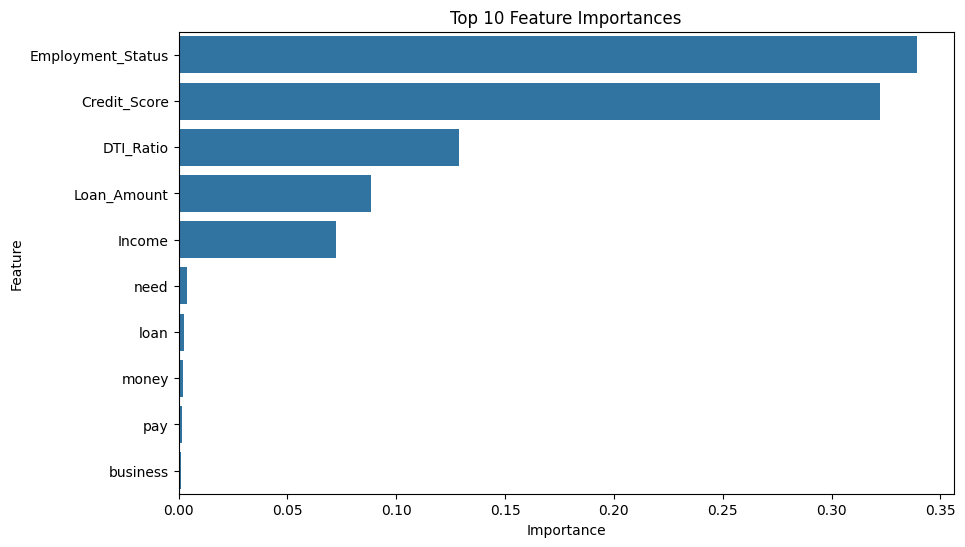

In [24]:
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out().tolist() + ["Income", "Credit_Score", "Loan_Amount", "DTI_Ratio", "Employment_Status"]

feature_names = feature_names[:100] + ["Income", "Credit_Score", "Loan_Amount", "DTI_Ratio", "Employment_Status"]

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.savefig("Top 10 Feature Importances.png")
plt.show()

# Analysis

# Top 10 Feature Importances

1. **Employment_Status**: Most important feature.
2. **Credit_Score**: Second most important.
3. **DTI_Ratio**: Debt-to-Income ratio.
4. **Loan_Amount**: Amount requested.
5. **Income**: Annual income.
6. **Text-Based Features**: `need`, `loan`, `money`, `pay`, `business` (less important).

### **Key Insight**:
- **Employment_Status** and **Credit_Score** are the top factors influencing loan approval predictions.
- Financial metrics (**DTI_Ratio**, **Loan_Amount**, **Income**) are also significant.
- Text-based features have minor influence.

# Saving  model and its related objects.

In [25]:
joblib.dump(model, "Random_Forest_model.pkl")
joblib.dump(scaler, "scaler_model.pkl")
joblib.dump(vectorizer, "TfidfVectorizer_model.pkl")

['TfidfVectorizer_model.pkl']